Nachdem wir nun die Grundlagen von Python und NumPy betractet haben werden wir jetzt eine Klasse schreiben die es ermöglicht ein Bild zu laden und dieses mit verschiedenen Operationen zu bearbeiten.

_Now that we have covered the basics of Python and NumPy, we will write a class that allows you to load an image and process it with various operations._

## 1. Bibliotheken importieren

Um die Aufgabe zu erfüllen benötigen wir verschiedene Bibliotheken:
- `pillow`
    - Bild Verarbeitung mit Python
    - Wird `PIL` genannt
- `numpy` (oft `np` abgekürzt)
    - Datenverabeitung
- `matplotlib.pyplot` (oft `plt` abgeküzt)
    - Datenvisualisierung
 
---

To fulfill the task we need different libraries:
- `pillow`
    - Image processing with Python
    - Called `PIL`
- `numpy` (often abbreviated `np`)
    - Data processing
- `matplotlib.pyplot` (often abbreviated `plt`)
    - Data visualization

In [1]:
import PIL
import numpy as np
import matplotlib.pyplot as plt

## 2. Bild Laden _Load Image_

1. Definieren einer Methode `load_image`
    - Nimmt einen Pfad (Typ `str`) als Eingabeparameter
    - Gibt ein NumPy Array (Typ `np.typing.NDArray`) als Ausgabe zurück
2. Das Bild einlesen mit der Methode `Image.open(<path>)` aus der `PIL` Bibliothek
    - Hierfür nutzen wir einen `with PIL.Image.open(path) as image:` Block, welcher automatisch das schliessen der Ressourcen übernimmt
    - Im Folgenden kann das Bild dann über `image` genutzt werden
4. Das geladene Bild mit der Methode `asarray(<image>)` as der `numpy` Bibliothek in ein NumPy Array konvertieren
5. Das NumPy Array zurück geben

---

1. _Define a method `load_image_
    - _Takes a path (Type `str`) as input parameter_
    - _Returns a NumPy array (Type `np.typing.NDArray`) as output_
2. _Read in the image with the method `Image.open(<path>)` from the `PIL` library_
    - _For this we use a `with PIL.Image.open(path) as image:` block, which automatically closes the resources_
    - _In the following, the image can then be used via `image_
4. _Convert the loaded image into a NumPy array using the method `asarray(<image>)` from the `numpy` library_
5. _Return the NumPy array_

In [2]:
def load_image(path:str) -> np.typing.NDArray:
    with PIL.Image.open(path) as image:
        img_as_array = np.asarray(image)
        return img_as_array

## 3. Bild in Graufstufen umwandlen _Convert to Grayscale Image_

Um das Bild später weiter zu verarbeiten müssen wir dieses in ein Graustufen Bild umwandlen.
Hierfür müssen wir:
1. Die einzelnen Kanäle (RGB) abspalten
2. Die Pixel mittels der ITU-R BT.709 Modells in einen Graustufen Wert umrechenen
    - Anteil Rot: 0.2989
    - Anteil Grün: 0.5870
    - Anteil Blau: 0.1140
4. Die Pixel auf den Bereich 0 bis 255 skalieren
    - Skalierungsfaktor  ermitteln: `255 / np.max(image_grayscale)`
    - Das Graustufen Bild mit dem Skalierungsfaktor multiplizieren
6. Die Werte im NumPy Array mit derm Methode `astype(<type>)` in den Typ `uint8` umwandeln
7. Das konvertierte Bild zurück geben

---

_In order to process the image later, we need to convert it into a grayscale image._
_For this we must:_
1. _Split off the individual channels (RGB)_
2. _Convert the pixels into a grayscale value using the ITU-R BT.709 model_
    - _Red component: 0.2989_
    - _Green component: 0.5870_
    - _Blue component: 0.1140_
4. _Scale the pixels to the range 0 to 255_
    - _Determine the scaling factor: `255 / np.max(image_grayscale)`_
    - _Multiply the grayscale image by the scaling factor_
6. _Convert the values in the NumPy array to the type `uint8` using the method `astype(<type>)`_
7. _Return the converted image_

In [3]:
def convert_to_grayscale(image: np.typing.NDArray) -> np.typing.NDArray:
    # split image into different color channels
    r, g, b, a = image[:,:, 0], image[:,:, 1], image[:,:, 2], image[:,:, 3]
    
    # convert to grayscale using ITU-R BT.709 weights
    img_greyscale = 0.2989 * r + 0.5870 * g + 0.1140 * b
    
    # normalize values to range between 0 and 255
    img_normalized = img_greyscale * (255 / np.max(img_greyscale))
    
    # return image as unsingned integer values
    return img_normalized.astype("uint8")

## 4. Kanten finden _Edge Detection_

1. Definieren sie die Funktion `detect_edges`
    - Eingabeparamter: `image` vom Typ `np.typing.NDArray`
    - Ausgabeparameter Typ `np.typing.NDArray`
2. Wenden sie nacheinander die Funktionen `apply_sobel_x` und `apply_sobel_y` auf das Bild an un speichern das Ergebnis in unterschiedlichen NumPy Arrays
3. Quardrieren sie die Werte der beiden NumPy Arrys. (TIP: Mit `**2` kann man die Elmente quardrieren)
4. Addieren sie die beiden NumPy Arrays zu einem
5. Ziehen sie aus jedem Wert die Qudratwurzel mit der Funktion `sqrt` aus der `numpy` Bibliothek
6. Die Werte auf den Bereich 0 bis 255 skalieren
    - Skalierungsfaktor  ermitteln: `255 / np.max(image_grayscale)`
    - Das Graustufen Bild mit dem Skalierungsfaktor multiplizieren
7. Die Werte im NumPy Array mit derm Methode `astype(<type>)` in den Typ `uint8` umwandeln
8. Das konvertierte Bild zurück geben


---

1. _Define the function `detect_edges`._
    - _Input parameter: `image` of type `np.typing.NDArray`_
    - _Output parameter type `np.typing.NDArray`._
2. _Apply the functions `apply_sobel_x` and `apply_sobel_y` to the image one after the other and store the result in different NumPy arrays_
3. _Square the values of the two NumPy arrays. (TIP: With `**2` you can square the elements)_
4. _Add the two NumPy arrays to one_
5. _Take the square root of each value with the function `sqrt` from the `numpy` library_
6. _Scale the values to the range 0 to 255_
    - _Determine the scaling factor: `255 / np.max(image_grayscale)`_
    - _Multiply the grayscale image by the scaling factor_
7. _Convert the values in the NumPy array to the type `uint8` using the method `astype(<type>)`_
8. _Return the converted image_

In [4]:
# Sobel Filter
def apply_sobel_x(image:np.typing.NDArray) -> np.typing.NDArray:
    # Sobel-X filter
    filter = np.array([[-1, 0, 1],
                       [-1, 0, 1],
                       [-1, 0, 1]])
    processed_img = np.zeros(image.shape)
    for x in range(0,image.shape[0]-2):
        for y in range(0, image.shape[1]-2):
            new_pixel = 0
            for x_filter in range(0,3):
                for y_filter in range(0,3):
                    new_pixel += image[x+x_filter,y+y_filter] * filter[x_filter,y_filter]
            processed_img[x+1,y+1] = new_pixel
    return processed_img * (255 / np.max(processed_img))

def apply_sobel_y(image:np.typing.NDArray) -> np.typing.NDArray:
    # Sobel-Y filter
    filter = np.array([[-1, -1, -1],
                       [ 0,  0,  0],
                       [ 1,  1,  1]])
    processed_img = np.zeros(image.shape)
    for x in range(0,image.shape[0]-2):
        for y in range(0, image.shape[1]-2):
            new_pixel = 0
            for x_filter in range(0,3):
                for y_filter in range(0,3):
                    new_pixel += image[x+x_filter,y+y_filter] * filter[x_filter,y_filter]
            processed_img[x+1,y+1] = new_pixel
    return processed_img * (255 / np.max(processed_img))

In [5]:
def detect_edges(image: np.typing.NDArray) -> np.typing.NDArray:
    image_sobel_x = apply_sobel_x(image)
    image_sobel_x = image_sobel_x**2
    image_sobel_y = apply_sobel_y(image)
    image_sobel_y = image_sobel_y**2
    combined_image = image_sobel_x = image_sobel_y
    image_sobel = np.sqrt(combined_image)
    normalized = image_sobel * (255 / np.max(image_sobel))
    return normalized.astype("uint8")

## 5. Anwendungsbeispiel _Application_

Jetzt wollen wir die zuvor implementierten Funktionen nuzen um ein RGB-Bild zu laden und in ein Graustufen Bild umzuwandeln und anschliissend die Kanten in dem Bild anzuzeigen.
1. Das Bild mit dem Pfad "src/lena.png" mit der Funktion `load_image` laden und in einer Variable `img` speichern
2. Die Variable `img` mit der Funktion `convert_to_grayscale` in ein Graustufen Bild umwandeln
3. Mit der Funktion `detect_edges` die Kantendetekion ausführen und in der Variable `edges` speichern


In [7]:
img: np.typing.NDArray = load_image("../src/lena.png")
img = convert_to_grayscale(img)
edge_img = detect_edges(img)

Der Nachfolgende Code Block enthält eine Visualiesrung der Ergebnisse.
Mit dem Slider ist es möglich einen Grenzwert  für die Binarisierung der Kantendetektion anzupassen.

_The following code block contains a visualization of the results._
_With the slider it is possible to adjust a limit value for the binarization of the edge detection._

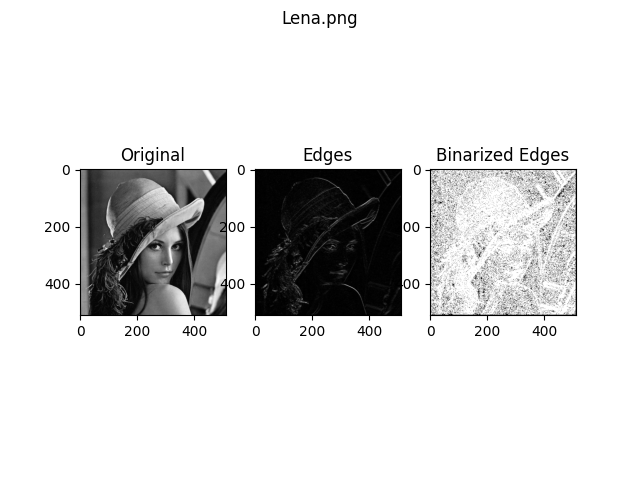

In [8]:
# Visualiserung des Ergebnisses (Visualization of the result)
%matplotlib ipympl
from ipywidgets import interact
from mpl_interactions import ipyplot as iplt

fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.suptitle("Lena.png")

ax1.set_title("Original")
ax1.imshow(img, cmap='gray', vmin=0, vmax=255)

ax2.set_title("Edges")
ax2.imshow(edge_img, cmap='gray', vmin=0, vmax=255)

def update_image(threshold:int=25) -> np.typing.NDArray:
    binarized = np.zeros(edge_img.shape)
    binarized[edge_img>threshold]=255
    return binarized
ax3.set_title("Binarized Edges")
controls = iplt.imshow(update_image, cmap='gray', vmin=0, vmax=255, ax=ax3, threshold=(0,255))

🎉 Sie haben es geschafft. Dies war unser Python Tutorial. Wenn sie bis hier hin gekommen sind, sollten sie keine Probleme beim Workshop haben!

🎉 _You have done it. This was our Python tutorial. If you have made it this far, you should have no problems with the workshop!_

Zusätzlicher Inhalt _Additional Content_:
- [Tutorial: Konfigurationen laden mit Tests _Data Loader with tests_](loader_sample.ipynb)